## Imports

In [1]:
import pandas as pd
import io

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np

from mpl_toolkits.mplot3d import Axes3D

import warnings

pd.set_option('display.precision', 3)
set_config(display="text") # estimators will be displayed as text, not as diagram (default is 'diagram'). Useful when calculating estimators.

# Optionally: we may reduce the text blurbs given back to us by warnings when executing code. 
# This is useful to avoid all of the Future Warning messages for say deprecation that are likely to happen
# with machine learning frameworks.  
# warnings.filterwarnings("ignore")

## Data

In [2]:
crabs_data = pd.read_csv("crabs.csv")

In [34]:
crabs_data.head()

,sp,sex,index,FL,RW,CL,CW,BD
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


Transform data set so easier to see which columns we have

In [3]:
crabs_data = crabs_data.rename(
    columns = {
        'sp': 'species',
        'FL': 'Frontal Lobe',
        'RW': 'Rear Width',
        'CL': 'Carapace Midline',
        'CW': 'Maximum Width Carapace',
        'BD': 'Body Depth',
    }
)

In [36]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width Carapace,Body Depth
0,B,M,1,8.1,6.7,16.1,19.0,7.0
1,B,M,2,8.8,7.7,18.1,20.8,7.4
2,B,M,3,9.2,7.8,19.0,22.4,7.7
3,B,M,4,9.6,7.9,20.1,23.1,8.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2


Check the Tail. See how it goes.

In [37]:
crabs_data.tail()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width Carapace,Body Depth
195,O,F,46,21.4,18.0,41.2,46.2,18.7
196,O,F,47,21.7,17.1,41.7,47.2,19.6
197,O,F,48,21.9,17.2,42.6,47.4,19.5
198,O,F,49,22.5,17.2,43.0,48.7,19.8
199,O,F,50,23.1,20.2,46.2,52.5,21.1


**Remap Values** for clarity. We can use the `.map` method of a DF to remap values **within a DF**.

In [4]:
# pick up the species column. Remap "B" to more clearly say "Blue"...
crabs_data['species'] = crabs_data["species"].map(
    {"B":"Blue", "O":"Orange"}
)

# repeat for sex
crabs_data['sex'] = crabs_data['sex'].map(
    {"M": "Male", "F": "Female"}
)

In [40]:
crabs_data['species'] .head()
crabs_data['sex'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

**Describe** the data

In [41]:
crabs_data.describe(include="all")


,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width Carapace,Body Depth
count,200,200,200.000,200.000,200.000,200.000,200.000,200.000
unique,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Blue,Male,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,25.500,15.583,12.738,32.105,36.415,14.030
std,NaN,NaN,14.467,3.495,2.573,7.119,7.872,3.425
min,NaN,NaN,1.000,7.200,6.500,14.700,17.100,6.100
25%,NaN,NaN,13.000,12.900,11.000,27.275,31.500,11.400
50%,NaN,NaN,25.500,15.550,12.800,32.100,36.800,13.900
75%,NaN,NaN,38.000,18.050,14.300,37.225,42.000,16.600


We get a bunch of NaNs because they are categorical variables. 

In [27]:
crabs_data.shape

(200, 8)

**Objective** of this work is to separate the data into 4 categories: sex X species.  

There are 200 pieces of data. 

In [5]:
# make a new column for class:
# concatenation of species and sex
crabs_data["class"] = crabs_data.species + crabs_data.sex

In [6]:
# get the counts
crabs_data["class"].value_counts()

class
BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: count, dtype: int64

## EDA

Drop some coluns that are not relevant. Begin by defining the relevant columns.

In [7]:
crabs_data.columns.to_list()

['species',
 'sex',
 'index',
 'Frontal Lobe',
 'Rear Width',
 'Carapace Midline',
 'Maximum Width Carapace',
 'Body Depth',
 'class']

In [8]:
data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width Carapace", "Body Depth"]

# describe only these columns
crabs_data[data_columns].describe()

,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width Carapace,Body Depth
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


### Boxplot

<Axes: >

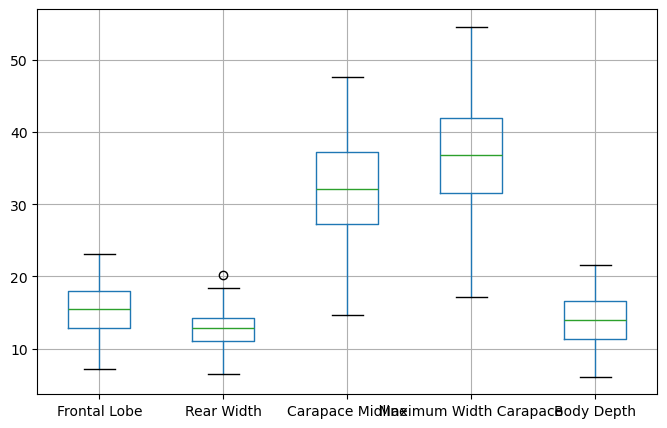

In [53]:
# create new figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# relevant columns
crabs_data[data_columns].boxplot()

## Initial Visualization of Classes

Suppose we want to study the **Frontal Lobe** depending on the classes we had defined previously

<Axes: title={'center': 'Frontal Lobe'}, xlabel='class'>

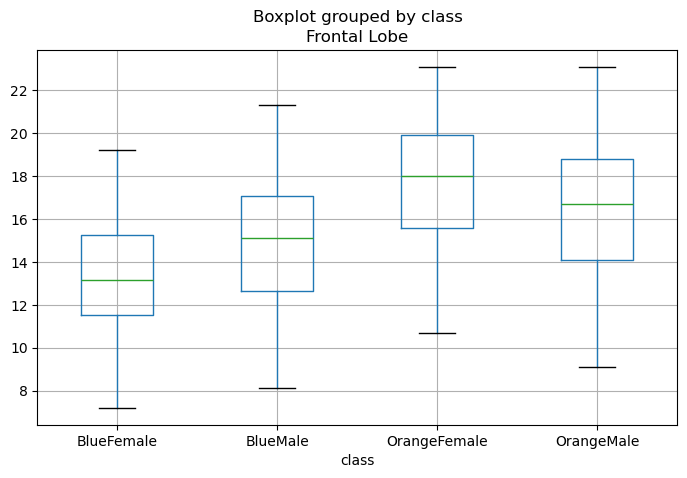

In [55]:
crabs_data.boxplot(
    column="Frontal Lobe", 
    by="class",
    figsize=(8,5)
)

We see on avarerage, for the Blue species, Females have less Frontal Lobe length. This is inverted for Orange species with Orange females having more Frontal Lobe length, on average.  

Repeat for **Rear Width** and others.

<Axes: title={'center': 'Rear Width'}, xlabel='class'>

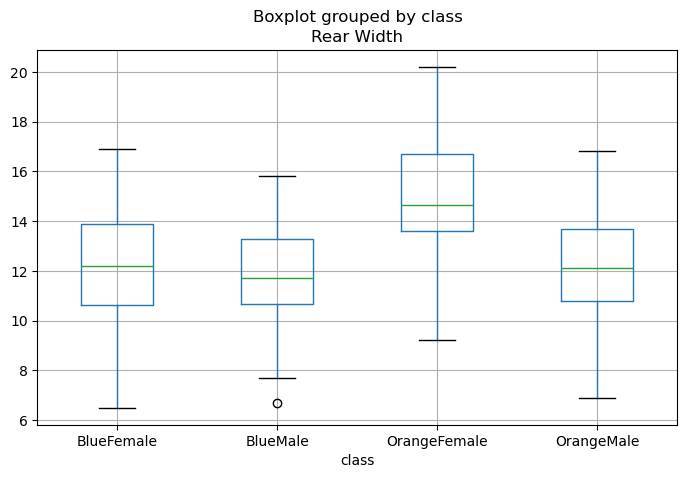

In [60]:
crabs_data.boxplot(
    column="Rear Width", 
    by="class",
    figsize=(8,5)
)

<Axes: title={'center': 'Carapace Midline'}, xlabel='class'>

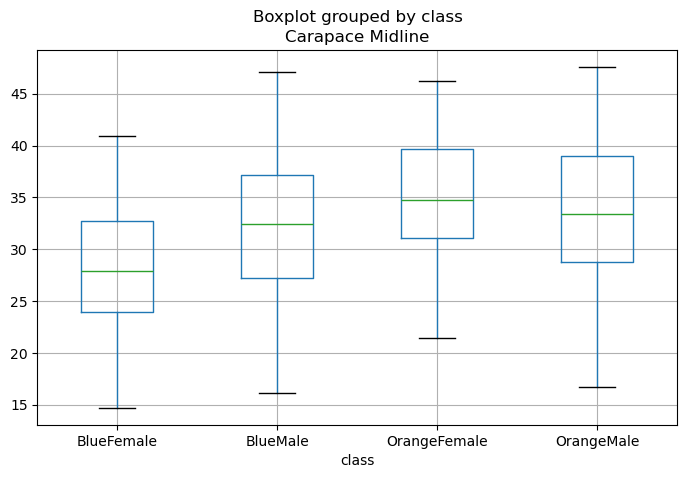

In [58]:
crabs_data.boxplot(
    column="Carapace Midline", 
    by="class",
    figsize=(8,5)
)

<Axes: title={'center': 'Maximum Width Carapace'}, xlabel='class'>

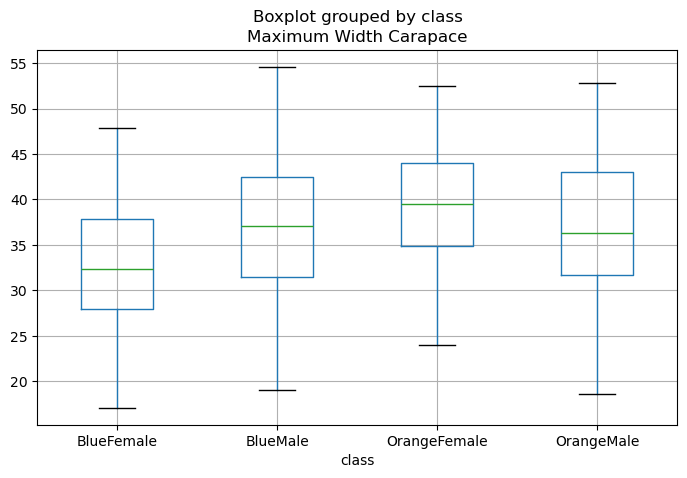

In [57]:
crabs_data.boxplot(
    column="Maximum Width Carapace", 
    by="class",
    figsize=(8,5)
)

<Axes: title={'center': 'Body Depth'}, xlabel='class'>

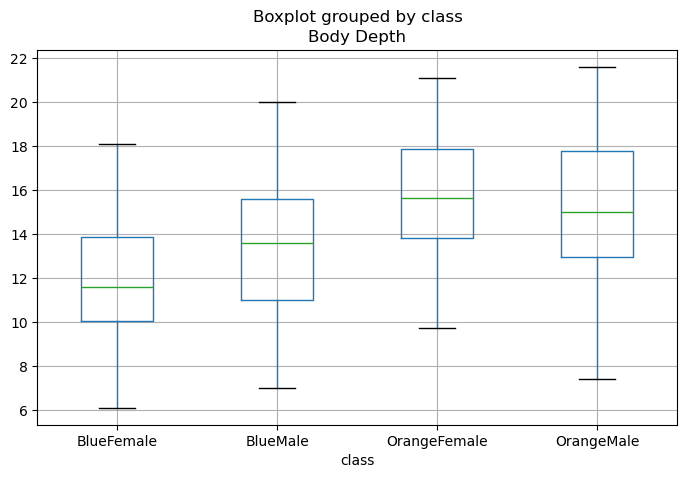

In [59]:
crabs_data.boxplot(
    column="Body Depth", 
    by="class",
    figsize=(8,5)
)

### Histograms

array([[<Axes: title={'center': 'Frontal Lobe'}>,
        <Axes: title={'center': 'Rear Width'}>,
        <Axes: title={'center': 'Carapace Midline'}>,
        <Axes: title={'center': 'Maximum Width Carapace'}>,
        <Axes: title={'center': 'Body Depth'}>, <Axes: >]], dtype=object)

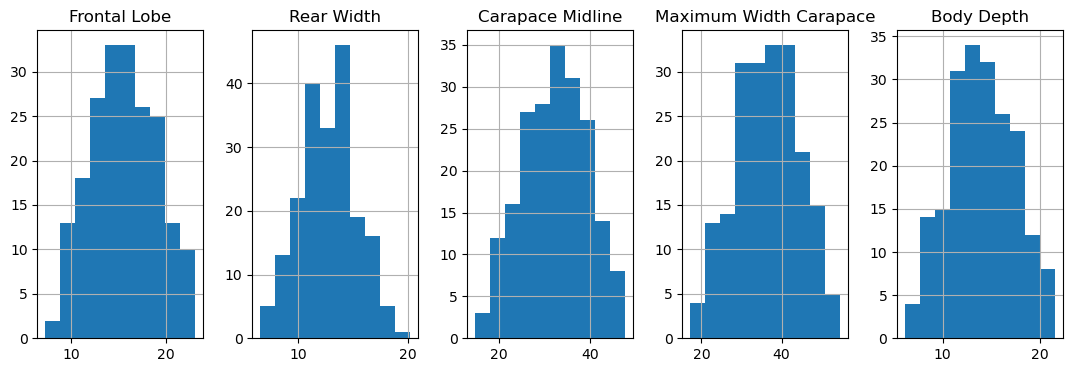

In [61]:
# Histogram for relevant columns.
# Gives histogram all the columns. Specifies layouts.
crabs_data[data_columns].hist(figsize=(16,4),layout=(1,6))

We can now study each class **Starting w Frontal Lobe**.  

The **hue** will be the **class** (blue Male for example).  

We need the Seaborn package.

/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Frontal Lobe', ylabel='Count'>

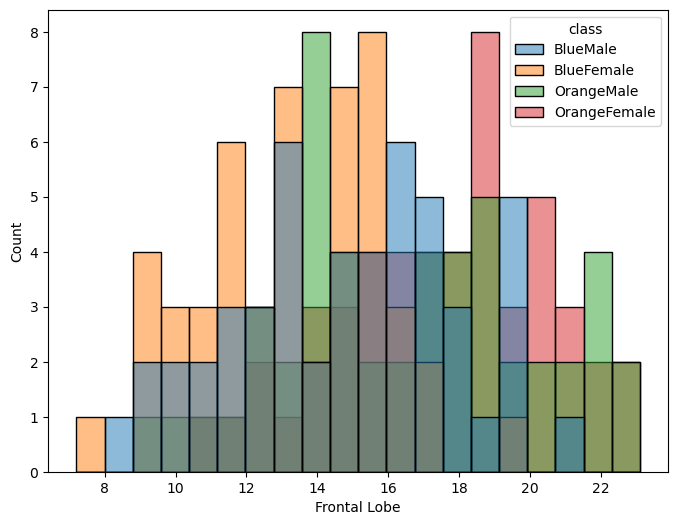

In [9]:
plt.figure(figsize=(8,6))

sns.histplot(crabs_data, x="Frontal Lobe", hue="class", bins=20)

Looks messy like this all overlapping. 

There are some interpretations you can make but I'm not too worried about that yet.  

We repeat the above plot for the different features.

Start with **Rear Width**

/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rear Width', ylabel='Count'>

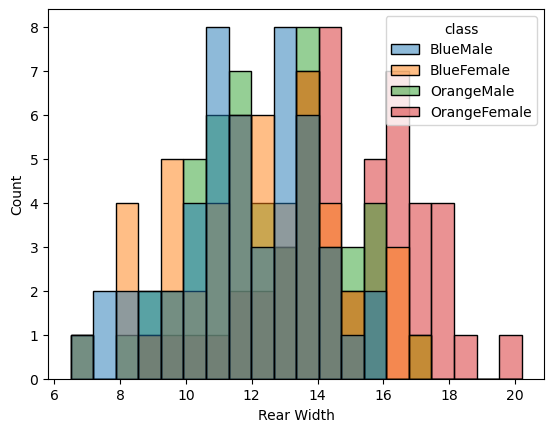

In [10]:
sns.histplot(crabs_data, x="Rear Width", hue="class", bins=20)

**Carapace Midline**

/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Carapace Midline', ylabel='Count'>

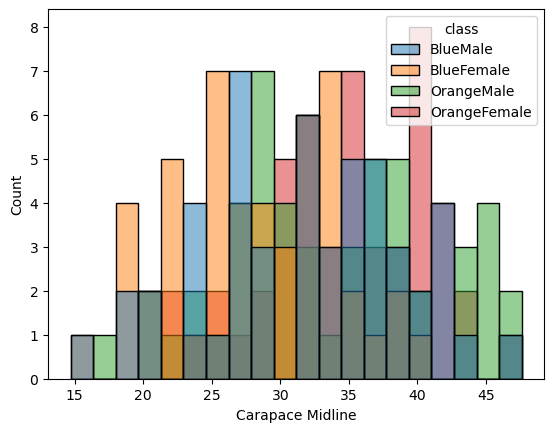

In [11]:
sns.histplot(crabs_data, x="Carapace Midline", hue="class", bins=20)

Other plots ommitted. 

### Pairplot

Pairwise relationships between the data in a single view. 

Useful using sns.  

/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jaimemerizalde/miniconda3/envs/machineLearning/lib/python3.12/site-packages

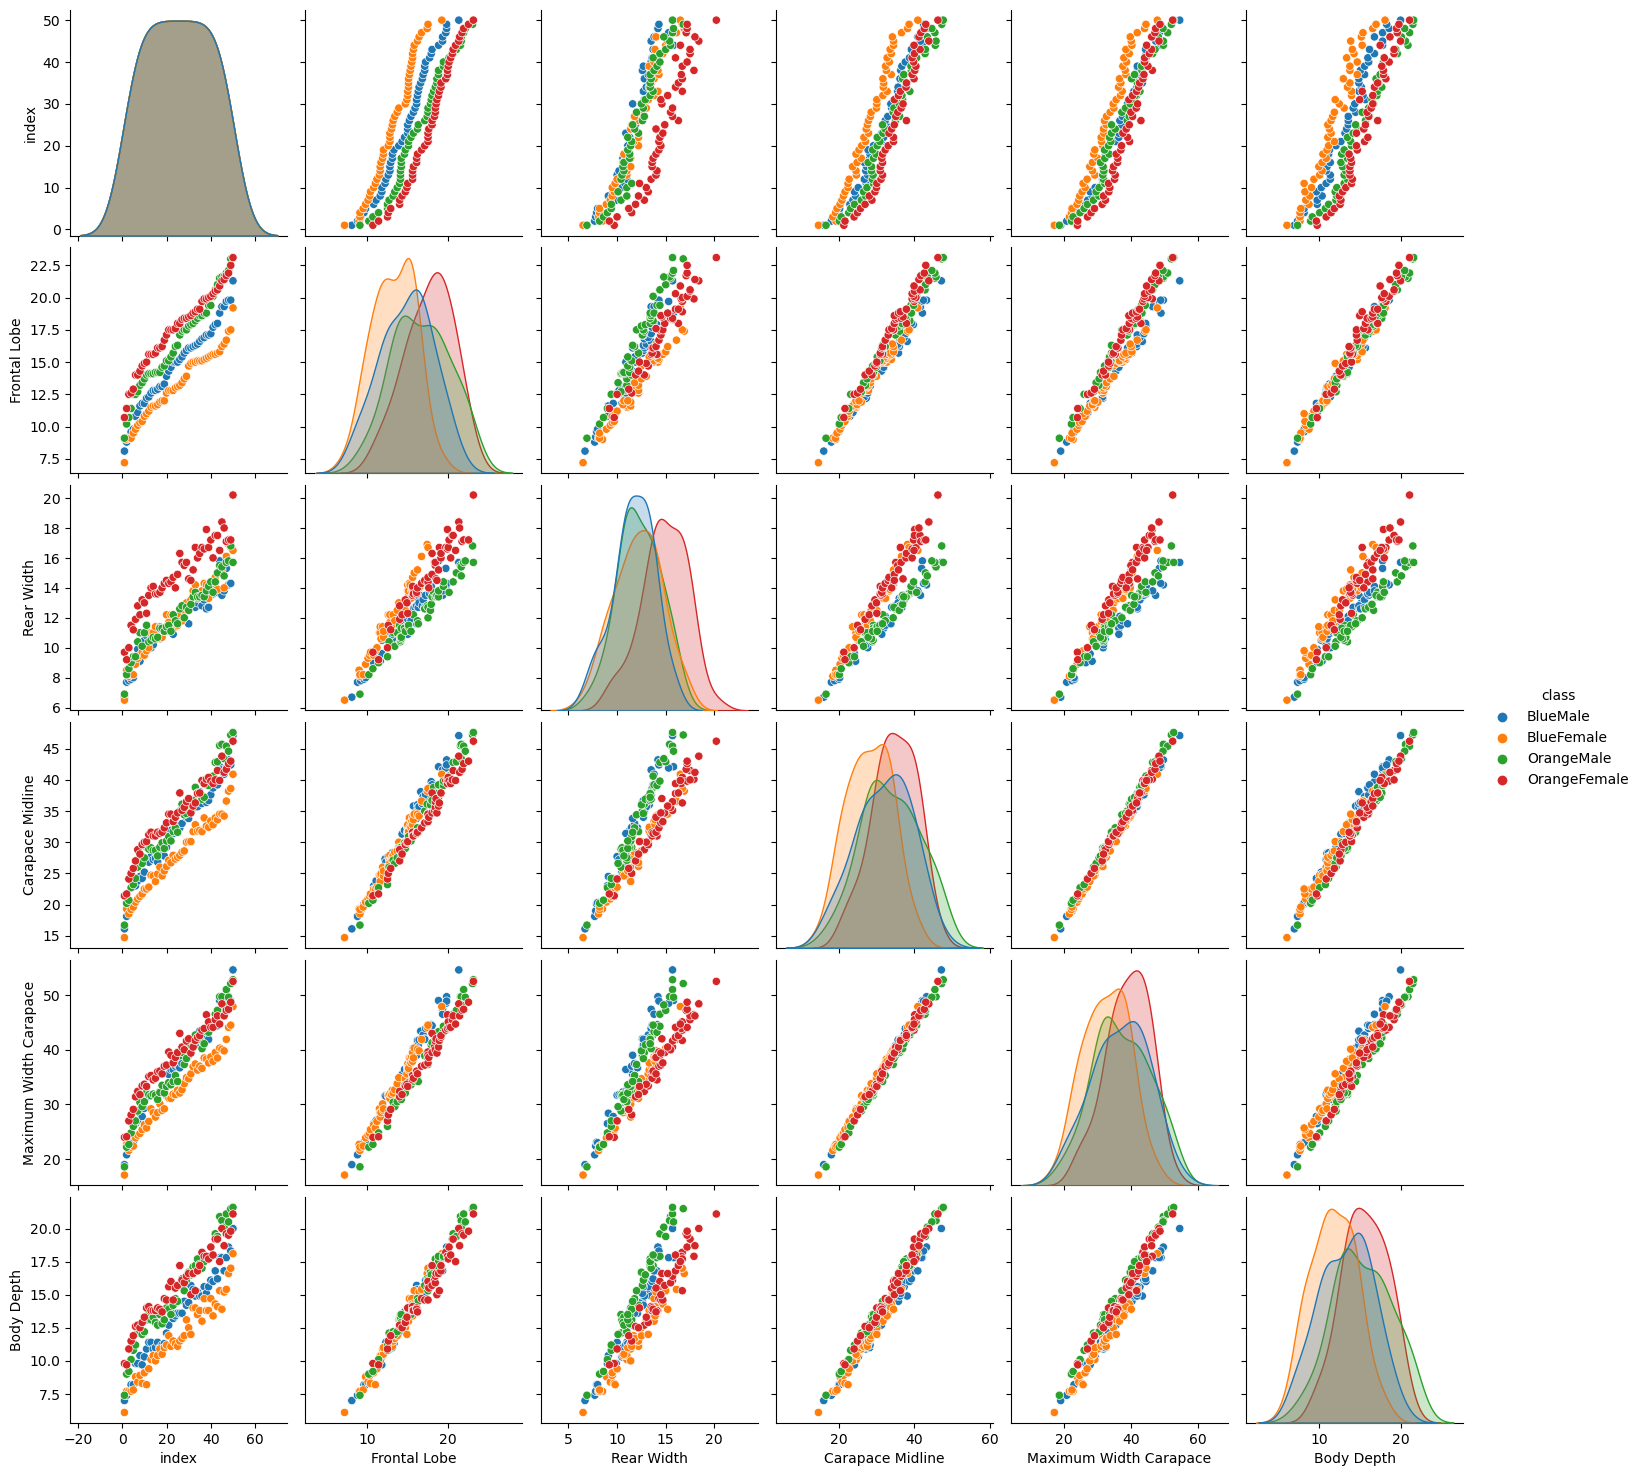

In [67]:
sns.pairplot(crabs_data, hue='class')

Along the diagonals are histograms of each class as with respect to the feature (Frontal Lobe for example).  

**The idea behind PCA** is motivated by the above. Here we have a lot of features and it is difficult to distinguish which are the most relevant or important ie the core features. It is hard to visualize the data. PCA can reduce the number of components to even 2/3D.  

If I had a pair plot with 800 features, this would be impractical. PCA makes this tractable.

## PCA

Use this for better visualization. 

We assume a **Gaussian Distribution** of the data.  

Therefore, we standardize the data...  

Some data **cannot be standardized** such as our categorical values.

In [12]:
crabs_standardized = crabs_data.copy()

In [13]:
# use the scalar to standardize the data (mean 0, stan dev 1)
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs_data[data_columns])

In [14]:
# Now just describe the standardized data. 
crabs_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550e+01,14.467,1.000,13.000,2.550e+01,38.000,50.000
Frontal Lobe,200.0,-7.105e-17,1.003,-2.404,-0.770,-9.465e-03,0.708,2.156
Rear Width,200.0,6.040e-16,1.003,-2.430,-0.677,2.396e-02,0.608,2.907
Carapace Midline,200.0,1.066e-16,1.003,-2.451,-0.680,-7.745e-04,0.721,2.182
Maximum Width Carapace,200.0,-4.974e-16,1.003,-2.460,-0.626,4.909e-02,0.711,2.316
Body Depth,200.0,0.000e+00,1.003,-2.321,-0.770,-3.820e-02,0.752,2.216


It looks like for the most part we have correclty standardized the data. BUT this of course assumes we have a GAUSSIAN DISTRIBUTION. You can see that there some numerical roundoff.  

We can ignore the index.

### Apply PCA

This mehod uses scikit-learn. 

Will return the expliaed variance ratio and all relevant PCA-related parameters. 

You can use explained variance ration and the singular values to decide how many components to keep. 

In [15]:
crabs_pca = PCA().fit(crabs_standardized[data_columns])

Now print the **explained variance ratio**. This will do it for each feature / variable.

In [16]:
print(crabs_pca.explained_variance_ratio_)
print(crabs_pca.explained_variance_ratio_.cumsum())

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]


We can see:
- Var 1: Frontal Lobe, explains this for 95% of the variance
- Var 2: Rear Width, explains 3% of the variance
- Var 3: Carapace Midline, ~1% of the variance
- Var 4: Maximum Width Carapace, <<1% of the variance
- Var 5: Body Depth, ~0% of the variance

Below that we can see the cumulative sum of the above.

**Applying the PCA theory**  

We can see using the cumulative sum that Var1 explains 95% of the varaiance while and Var1 + Var2 explain 98.8% of the varaince, which is very good.   

With the first vars we have 99.9% of the variance explained. 
This suggests we want to approach this visualization in 3D!  

### Screeplot

Screeplot used to determine number of principle components to keep in a PCA.

Text(0.5, 1.0, 'Scree Plot')

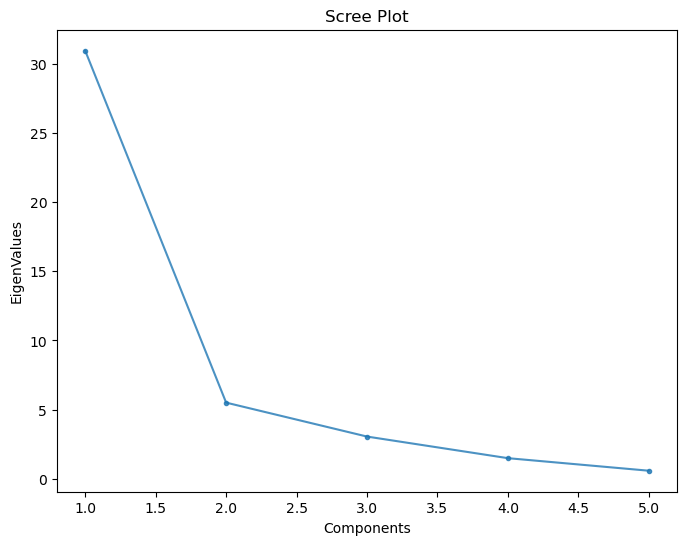

In [89]:
# create new figure
fig = plt.figure(figsize=(8, 6))

# plot the crabs data. PCA singular values "eigen values" 
# The reason this is scree is because we have a monotonic decreasing funciton
# With a potentially LARGE differential among the first few elements.
# This is not ordered in the traditional sense of ordering a plot. 
plt.plot(
    range(1, len(crabs_pca.singular_values_) + 1), 
    crabs_pca.singular_values_, # Eigen values
    alpha=0.8,
    marker='.',
)

# Label axes
y_label = plt.ylabel("EigenValues")
x_label = plt.xlabel("Components")

# Title
plt.title("Scree Plot")

We can see that the first 3 components capture most of the "cliff" in a scree plot.

### % Of Explained Variance by Component

Text(0.5, 1.0, 'Percentage of Variance Explained by Component')

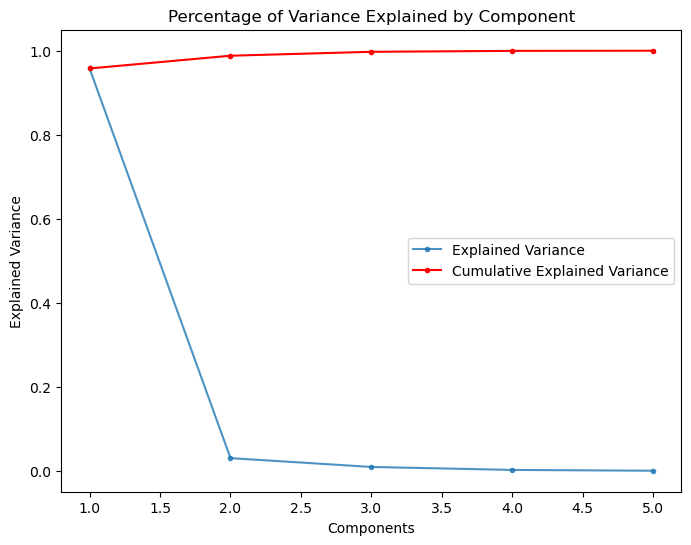

In [98]:
fig = plt.figure(figsize=(8,6))

plt.plot(
    range(1, len(crabs_pca.explained_variance_ratio_) + 1),
    crabs_pca.explained_variance_ratio_,
    alpha=0.8,
    marker=".",
    label="Explained Variance"
)

# plot the cumulative sum on top of this curve
plt.plot(
    range(1, len(crabs_pca.explained_variance_ratio_) + 1),
    np.cumsum(crabs_pca.explained_variance_ratio_),
    c="r",
    marker=".",
    label="Cumulative Explained Variance"
)

y_label=plt.ylabel("Explained Variance")
x_label=plt.xlabel("Components")

plt.legend()
plt.title("Percentage of Variance Explained by Component")

We can see the above is a representation of the first array we saw previously.  

Let's plot the cumulative sum on top of this library. 

We can visualize the **weights assigned by the PCA** to each component.

In [17]:
crabs_pca.components_

array([[-0.45204368, -0.42807736, -0.45319102, -0.45111272, -0.45113358],
       [-0.13758126,  0.89813071, -0.26823815, -0.18059588, -0.26432187],
       [-0.53076841,  0.01197915,  0.30968155,  0.65256956, -0.44316103],
       [ 0.69692337, -0.0837032 , -0.00144463,  0.08918782, -0.70663642],
       [ 0.09649156, -0.05441759, -0.79168267,  0.57452672,  0.17574331]])

Looks like problem goes away if I downgrade MATPLOTLIB to version 3.7.3.
I experienced the same thing, but it was improved by setting MATPLOTLIB to version 3.7.3.

pip uninstall matplotlib  
pip install matplotlib==3.7.3

<Axes: >

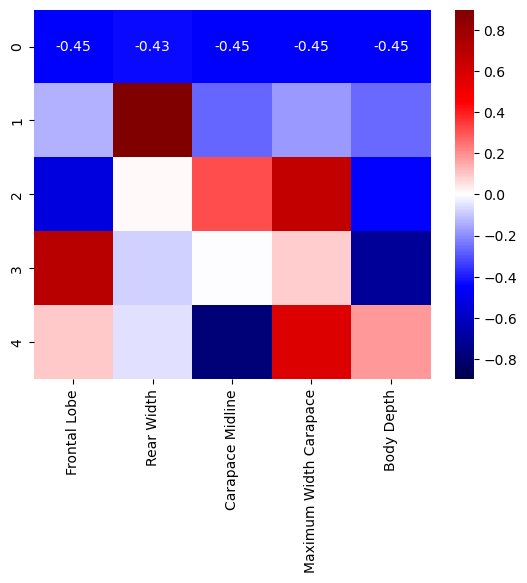

In [18]:
sns.heatmap(
    crabs_pca.components_, 
    cmap="seismic",
    xticklabels=list(crabs_data.columns[3:-1]), # We are pickin up the relevant columns only.
    vmin=-np.max(np.abs(crabs_pca.components_)),
    vmax=np.max(np.abs(crabs_pca.components_)),
    annot=True # show the value of the weights in each heatmap cell
)

Not sure if rendering is not working properly, but I don't see all of the weights printed on here.

Moving on...

### PCA Transformation and Visualization

Now transform the dataset using the "trained" PCA.  

They say trained because there was some data-dependent work required 
to come up with that **model**.  

For visualizations, using 2-3 components is usually the way.

In [19]:
# Use the standardized data and the relevant columns.
# Creates transformed data
crabs_data_transformed = crabs_pca.transform(
    crabs_standardized[data_columns]
)

# Append the transformed data to the previous DF.  
crabs_standardized[
    ['PC1', 'PC2', 'PC3']
] = crabs_data_transformed[:, :3] # use only the first three columns.

Plot this.

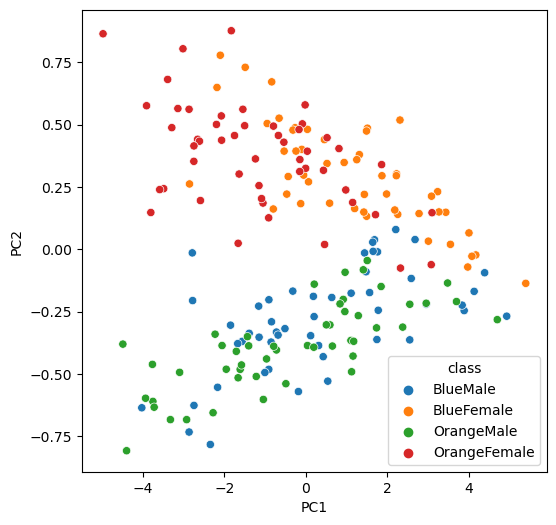

In [20]:
fig = plt.figure(figsize=(6,6))
_ = sns.scatterplot(
    x='PC1', y='PC2', hue='class', data=crabs_standardized
)

This shows separation of the four groups as per the goal of this problem setup. 

The key question, which was not provided in the data, is how we can classify each piece of data by SEX x SPECIES. 

Along these principal components, we get these results in a way that is **well separated**. We can see on these axes a very obvious stratification.

No information is added here. So what we are looking at really is a way to **VIEW the data.** We are not creating new information / data. Each BlueMale or class is already labeled. But from this VIEW (along principal components), we have a maximum separation and distinguishing of features. 

I have a feeling we will use this to then classify "new" data, given the same number of inputs as previous data, we can classify using this PCA result and provide a label :). 

### Three Components

Do it again, but for 3 components.

In [21]:
crabs_standardized[
    ['PC1', 'PC2', 'PC3']
]

,PC1,PC2,PC3
0,4.928,-0.268,-0.122
1,4.386,-0.094,-0.039
2,4.129,-0.169,0.034
3,3.884,-0.246,0.015
4,3.834,-0.224,-0.015
...,...,...,...
195,-3.391,0.682,-0.257
196,-3.488,0.243,-0.319
197,-3.586,0.239,-0.280
198,-3.804,0.148,-0.284


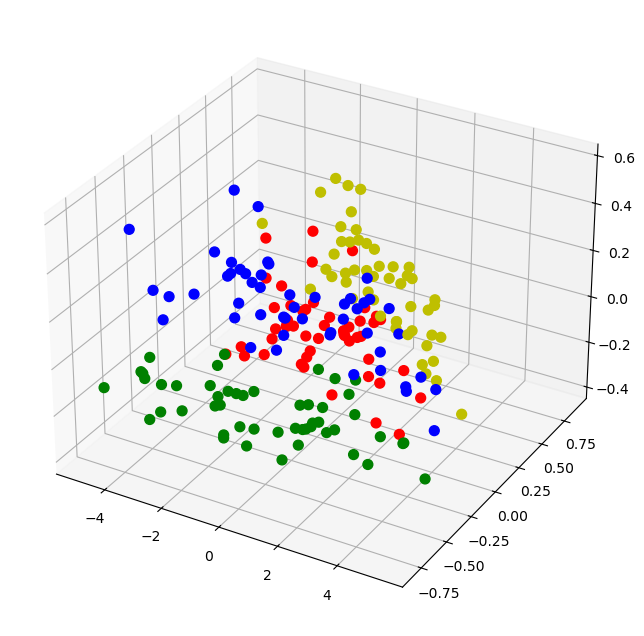

In [22]:
# define a dictionary for coloring these classes.
colors_crabs = {
    "BlueFemale": "y",
    "BlueMale": "b",
    "OrangeFemale": "r",
    "OrangeMale": "g"
}

# 3D plot
# first this creates a 2D figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d") # add another axis to existing 2D figure.

plt.scatter(
    crabs_standardized.PC1, crabs_standardized.PC2, zs=crabs_standardized.PC3,
    depthshade=False, # Visualize all data without any opacity changes.
    c=crabs_data["class"].apply(lambda x: colors_crabs[x]), #colors mapping. Given a class, apply this mapping defined above that maps to a color key of the scatter method.
    s=50, # specify marker size
)

### Now with PlotLy Library

In [30]:
fig = px.scatter_3d(
    crabs_standardized,
    x="PC1", y="PC2", z="PC3",
    color="class"
)
fig.show()